<a href="https://colab.research.google.com/github/assaabriiii/My-Machine-Learning-Journey/blob/main/diamond_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import opendatasets as od
import pandas as pd

# 1. Download
od.download("https://www.kaggle.com/datasets/shivam2503/diamonds")

Skipping, found downloaded files in "./diamonds" (use force=True to force download)


In [110]:
df = pd.read_csv('/content/diamonds/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [111]:
df['cut'].unique()
df['color'].unique()
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [112]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 4}
df['cut'] = df['cut'].map(cut_mapping)

In [113]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [114]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [115]:
color_mapping = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
df['color'] = df['color'].map(color_mapping)

clarity_mapping = {
    "I1": 1, "SI2": 2, "SI1": 3,
    "VS2": 4, "VS1": 5,
    "VVS2": 6, "VVS1": 7, "IF": 8
}
df['clarity'] = df['clarity'].map(clarity_mapping)

In [116]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [117]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [118]:
X = df.drop(['price', 'x', 'y', 'z', 'Unnamed: 0'], axis=1)
y = df['price']

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [120]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [121]:
y_pred = model.predict(x_test)

In [122]:
y_pred

array([  578.5486992 ,  3217.85206299,  2134.39615019, ...,
         562.17927415, -1121.0891455 ,  2827.97488921])

In [123]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [124]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

1507979.6871795966
0.9047732585966743


In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

In [127]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

1730949.0601156265
0.8906930644150454


In [128]:
rf_model.max_depth

3

In [129]:
# 54371.47359826892
# 0.9965665198940816

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

284659.29811169894
0.9820241760550277


In [132]:
print(X.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')


In [133]:
X.head()

,carat,cut,color,clarity,depth,table
0,0.23,4,6,2,61.5,55.0
1,0.21,4,6,3,59.8,61.0
2,0.23,2,6,5,56.9,65.0
3,0.29,4,2,4,62.4,58.0
4,0.31,2,1,2,63.3,58.0


In [134]:
X.tail()

,carat,cut,color,clarity,depth,table
53935,0.72,4,7,3,60.8,57.0
53936,0.72,2,7,3,63.1,55.0
53937,0.70,3,7,3,62.8,60.0
53938,0.86,4,3,2,61.0,58.0
53939,0.75,4,7,2,62.2,55.0


/tmp/ipython-input-2464876037.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


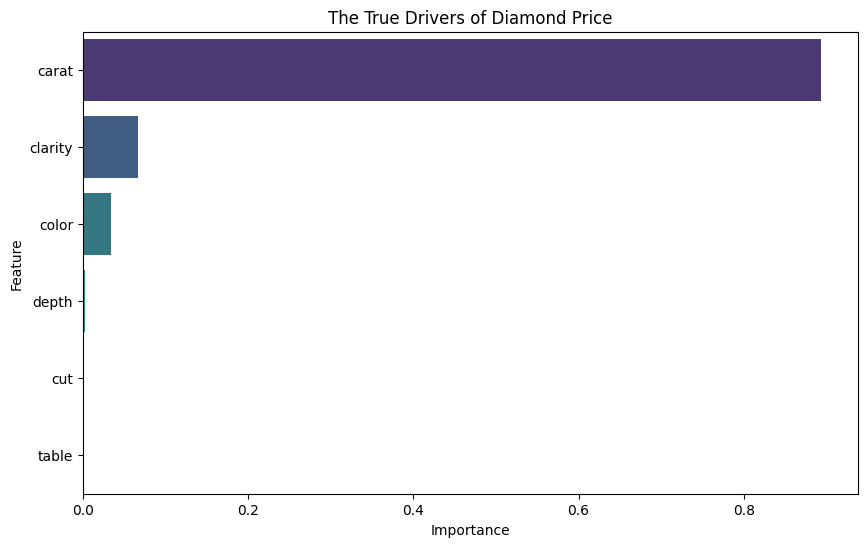

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importance from your Gradient Boosting model
importances = gb_model.feature_importances_
feature_names = X.columns

# Create a plot
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('The True Drivers of Diamond Price')
plt.show()